In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Twitter API mots de passe
CONSUMER_KEY = "OjL1upA53Anv5G9b1rPI9hLhl"
CONSUMER_SECRET = "nZZX51768Kte5eBmvXPnk6cS82hghNMJdegFaWC9CQVM1uzHG2"
ACCESS_TOKEN = "1058419050240491521-RR4SCqglA9EscH8NftL4ZlsooX3pvA"
ACCESS_SECRET = "0cnaTDFl9hVV4WFqEdzbH3SABzc9gCw8Yk2oO3JgLNRAT"

In [3]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


In [59]:
tweets=[]
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
for status in tweepy.Cursor(api.user_timeline,screen_name="elonmusk").items(5000):
    tweets.append(status)



print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 3231.

5 recent tweets:

RT @SpaceX: Starman’s current location. Next stop, the restaurant at the end of the universe. https://t.co/Ty5m8IjJpE

@martinengwicht @DatHandsomeJerk @vincent13031925 @Teslarati @panasonic Yes, Germany has outstanding engineering talent

@samsheffer Just a few mins, which is mostly accelerating &amp; decelerating

https://t.co/xGJ4Bc6HpL

So underappreciated



In [60]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,RT @SpaceX: Starman’s current location. Next s...
1,@martinengwicht @DatHandsomeJerk @vincent13031...
2,"@samsheffer Just a few mins, which is mostly a..."
3,https://t.co/xGJ4Bc6HpL
4,So underappreciated
5,@nichegamer @candiceruizy Ok
6,@MacTechGenius Ok
7,Walked full length of Boring Co tunnel under L...
8,@planet4589 Sounds like pure luxury! When I sa...
9,@_DionnaLeo @CouRageJD What is love?


In [61]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [62]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1059128348415209472
2018-11-04 17:00:50
Twitter for iPhone
0
11967
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SpaceX', 'name': 'SpaceX', 'id': 34743251, 'id_str': '34743251', 'indices': [3, 10]}], 'urls': [], 'media': [{'id': 1058518173203320832, 'id_str': '1058518173203320832', 'indices': [94, 117], 'media_url': 'http://pbs.twimg.com/media/DrCcq5YUUAAmHTC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DrCcq5YUUAAmHTC.jpg', 'url': 'https://t.co/Ty5m8IjJpE', 'display_url': 'pic.twitter.com/Ty5m8IjJpE', 'expanded_url': 'https://twitter.com/SpaceX/status/1058518183064219648/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 2048, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 680, 'h': 680, 'resize': 'fit'}}, 'source_status_id': 1058518183064219648, 'source_status_id_str': '1058518183064219648', 'source_user_id': 34743251, 'source_user_id_str': '347432

In [63]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [64]:
# Display of first 10 elements from dataframe:
display(data.tail(10))


,Tweets,len,ID,Date,Source,Likes,RTs
3221,@Xuan_Thai System was green for launch. I call...,56,832995083519614976,2017-02-18 16:47:58,Twitter for iPhone,1082,175
3222,"@spacecom They are often right, but, in this c...",144,832992529872097280,2017-02-18 16:37:50,Twitter for iPhone,540,57
3223,@zperrin99 Uses high pressure bleed off the fu...,117,832986598627106818,2017-02-18 16:14:15,Twitter for iPhone,463,37
3224,"Btw, 99% likely to be fine (closed loop TVC wd...",134,832984361989386240,2017-02-18 16:05:22,Twitter for iPhone,8200,1153
3225,@Zybbby Not obviously related to the (very tin...,94,832979955092819968,2017-02-18 15:47:51,Twitter for iPhone,374,35
3226,"If this is the only issue, flight would be fin...",138,832973218348625920,2017-02-18 15:21:05,Twitter for iPhone,5368,821
3227,"All systems go, except the movement trace of a...",140,832970849791537152,2017-02-18 15:11:41,Twitter for iPhone,8566,1686
3228,RT @SpaceX: 1 hour from launch of Falcon 9 &am...,148,832954058730115074,2017-02-18 14:04:57,Twitter for iPhone,0,3085
3229,Counting down to the first SpaceX launch from ...,121,832871068066942976,2017-02-18 08:35:11,Instagram,6840,1367
3230,RT @NASA: Hear from experts at 5pm ET about th...,140,832869029580664833,2017-02-18 08:27:05,Twitter for iPhone,0,969


In [65]:
display(data.iloc[-1,3])

Timestamp('2017-02-18 08:27:05')

In [66]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 87.13896626431445


In [67]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Had to been done ur welcome https://t.co/7jT0f9lqIS
Number of likes: 1215324
51 characters.

The tweet with more retweets is: 
Had to been done ur welcome https://t.co/7jT0f9lqIS
Number of retweets: 400528
51 characters.



In [68]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])


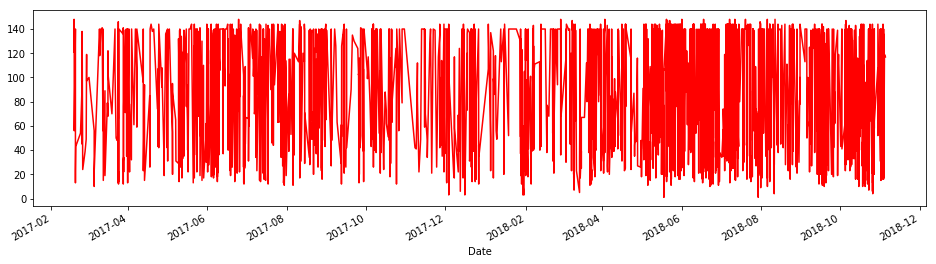

In [69]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


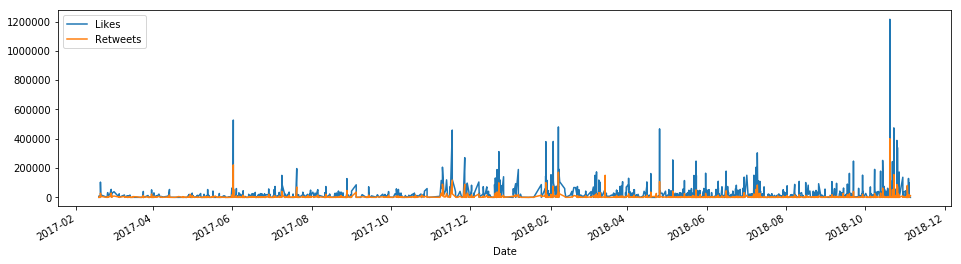

In [70]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [71]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))


Creation of content sources:
* Twitter for iPhone
* Instagram
* Twitter Web Client
* Twitter Lite


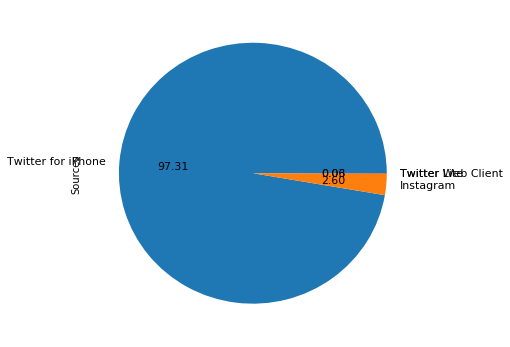

In [72]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


In [73]:
sources


['Twitter for iPhone', 'Instagram', 'Twitter Web Client', 'Twitter Lite']

In [74]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
def analize_sentimentDetailed(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    
    return analysis.sentiment.polarity
    

In [75]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
data['SAdetailed']=np.array([ analize_sentimentDetailed(tweet) for tweet in data['Tweets'] ])
# We display the updated dataframe with the new column:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs,SA,SAdetailed
0,RT @SpaceX: Starman’s current location. Next s...,117,1059128348415209472,2018-11-04 17:00:50,Twitter for iPhone,0,11967,0,0.000000
1,@martinengwicht @DatHandsomeJerk @vincent13031...,119,1058862358494212096,2018-11-03 23:23:53,Twitter for iPhone,805,61,1,0.500000
2,"@samsheffer Just a few mins, which is mostly a...",76,1058772996112826369,2018-11-03 17:28:47,Twitter for iPhone,2188,62,1,0.150000
3,https://t.co/xGJ4Bc6HpL,23,1058767039102312448,2018-11-03 17:05:07,Twitter for iPhone,98629,15202,0,0.000000
4,So underappreciated,19,1058624233750749185,2018-11-03 07:37:40,Twitter for iPhone,32631,3284,0,0.000000
5,@nichegamer @candiceruizy Ok,28,1058623815922544641,2018-11-03 07:36:00,Twitter for iPhone,1614,26,1,0.500000
6,@MacTechGenius Ok,17,1058622950025265152,2018-11-03 07:32:34,Twitter for iPhone,1265,33,1,0.500000
7,Walked full length of Boring Co tunnel under L...,140,1058622599188504576,2018-11-03 07:31:10,Twitter for iPhone,74109,5176,-1,-0.125000
8,@planet4589 Sounds like pure luxury! When I sa...,139,1058619991468068864,2018-11-03 07:20:48,Twitter for iPhone,1669,107,1,0.071429
9,@_DionnaLeo @CouRageJD What is love?,36,1058617148904361984,2018-11-03 07:09:31,Twitter for iPhone,1840,134,1,0.500000


In [76]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [77]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 43.608789848344166%
Percentage of neutral tweets: 41.41132776230269%
Percentage de negative tweets: 14.979882389353142%


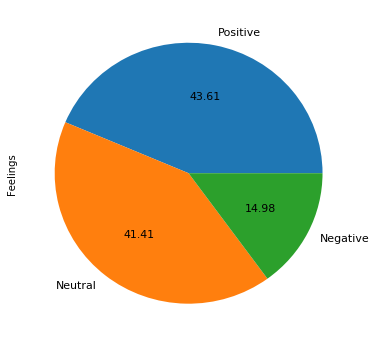

In [78]:

percentpie=[len(pos_tweets)*100/len(data['Tweets']),len(neu_tweets)*100/len(data['Tweets']),len(neg_tweets)*100/len(data['Tweets'])]
sourcespie=['Positive','Neutral','Negative']
# Pie chart:
pie_chart = pd.Series(percentpie, index=sourcespie, name='Feelings')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# Tweets sentimental impact on Tesla Stock Price



In [126]:
import pandas as pd
import quandl
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
#start = datetime.datetime(2016,1,1)
start=data.iloc[-1,3]
#end = datetime.date.today()
end = data.iloc[0,3] 

# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "TSLA"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
type(apple)

pandas.core.frame.DataFrame

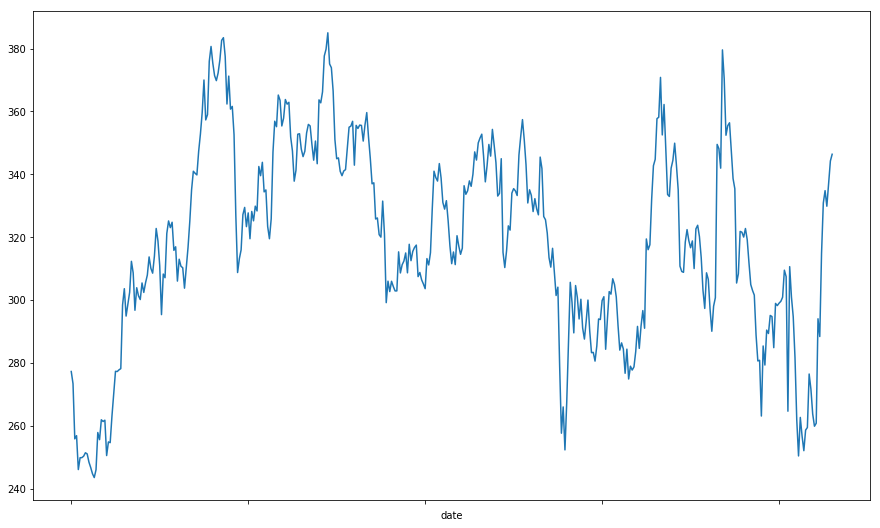

,open,high,low,close,volume
date,,,,,
2018-10-29,337.47,347.1600,326.500,334.85,14486027
2018-10-30,328.39,337.8999,322.260,329.90,9126704
2018-10-31,332.54,342.0000,329.100,337.32,7624348
2018-11-01,338.26,347.8400,334.725,344.28,8000132
2018-11-02,343.74,349.2000,340.910,346.41,7807971


In [141]:
from iexfinance import get_historical_data
from datetime import datetime

start_date=data.iloc[-1,3]
end_date=data.iloc[1,3]
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

dataa = get_historical_data('TSLA', start=start_date, end=end_date, output_format='pandas')

dataa.close.plot()
plt.show()


In [155]:
dataa.tail()


,open,high,low,close,volume
date,,,,,
2018-10-29,337.47,347.1600,326.500,334.85,14486027
2018-10-30,328.39,337.8999,322.260,329.90,9126704
2018-10-31,332.54,342.0000,329.100,337.32,7624348
2018-11-01,338.26,347.8400,334.725,344.28,8000132
2018-11-02,343.74,349.2000,340.910,346.41,7807971


In [81]:
sent=pd.Series(data=data['SAdetailed'].values, index=data['Date'])
#plt.plot(data['Date'],norm(data['SAdetailed'].values))


pandas.core.series.Series

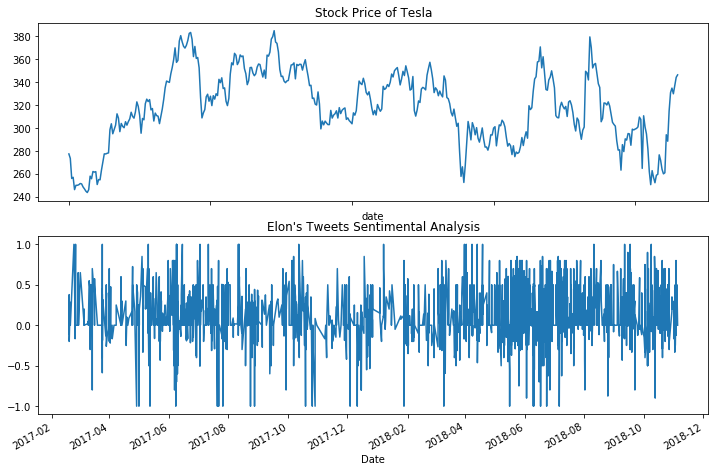

In [142]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8));
#fig.autofmt_xdate()
dataa['close'].plot(
    ax=axarr[0],title="Stock Price of Tesla"
    
)

sent.plot(
    ax=axarr[1],title="Elon's Tweets Sentimental Analysis"
)
type(sent)